In [1]:
import geopandas as gpd
import pandas as pd

# Load the hotel data
hotels_df = pd.read_excel('Classified Hotels( 1-5 Star).xlsx')
hotels_df['Grade'] = hotels_df['Grade'].map({'ONE': 1, 'TWO': 2, 'THREE': 3, 'FOUR': 4, 'FIVE': 5})

# Load the shapefile
shapefile_gdf = gpd.read_file('Shape File\lka_admbnda_adm1_slsd_20220816.shp')

In [2]:
# Convert the hotels DataFrame to a GeoDataFrame
hotels_gdf = gpd.GeoDataFrame(
    hotels_df,
    geometry=gpd.points_from_xy(hotels_df.Logitiute, hotels_df.Latitude)
)

# Set the CRS for the hotels GeoDataFrame to match the shapefile
hotels_gdf.crs = shapefile_gdf.crs


c:\Users\96598\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\96598\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\96598\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\96598\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

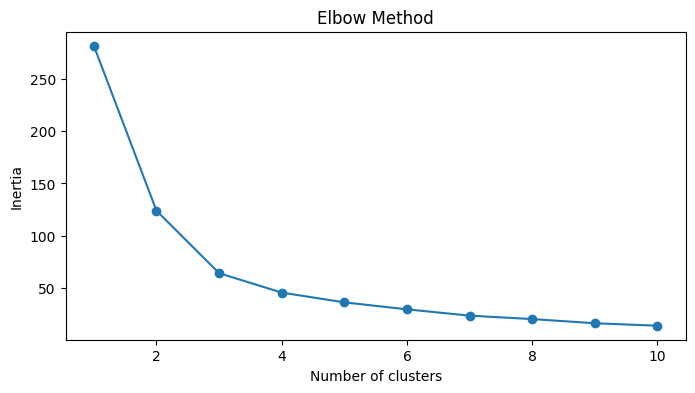

c:\Users\96598\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


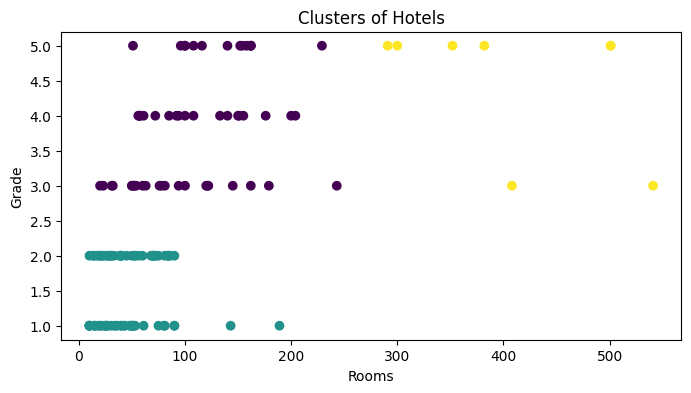

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Select features for clustering
X = hotels_df[['Grade', 'Rooms']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing K using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Fit the K-Means model
k = 3 
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X_scaled)

# Add cluster information back to the original DataFrame
hotels_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 4))
plt.scatter(hotels_df['Rooms'], hotels_df['Grade'], c=hotels_df['Cluster'], cmap='viridis')
plt.title('Clusters of Hotels')
plt.xlabel('Rooms')
plt.ylabel('Grade')
plt.show()
